# Глава 11 Оценивание моделей(МО Крис Элбон)

# Перекрестная проверка моделей

Требуется оценить, насколько хорошо модель будет работать в реальном мире.

Создать конвейер, который предварительно обрабатывает данные, тренирует модель, а затем оценивает ее с помощью перекрестной проверки.

In [1]:
#загрузить библиотеки
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#загрузить набор данных рукописных цифр
digits = datasets.load_digits()

In [3]:
#создать матрицу признаков
features = digits.data

In [4]:
#создать вектор целей
target = digits.target

In [5]:
#создать стандартизатор
standardizer = StandardScaler()

In [6]:
#создать объект логистической регрессии
logit = LogisticRegression()

In [7]:
#создать конвейер, который стандартизирует, затем
#выполняет логистическую регрессию
pipeline = make_pipeline(standardizer, logit)

In [8]:
#создать к-блочную перекрестную проверку
kf = KFold(n_splits=10, shuffle=True, random_state=1)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [9]:
#выполнить к-блочную перекрестную проверку
cv_results = cross_val_score(
    pipeline, #Конвейер
    features, #Матрица признаков
    target,  #Вектор целей
    cv=kf,   #Метод перекрестной проверки
    scoring= "accuracy", #Функция потери
    n_jobs=-1 #Использовать все ядра CPU
)

In [10]:
#вычислить среднее значение
cv_results.mean()

0.964931719428926

In [11]:
print('cv_results', cv_results)

cv_results [0.97222222 0.97777778 0.95555556 0.95       0.95555556 0.98333333
 0.97777778 0.96648045 0.96089385 0.94972067]


### Обсуждение

Наша цель состоит не в том, чтобы оценить, насколько хорошо работает модель с нашими тренировочными данными, а в том насколько хорошо она работает  с данными, которые она никогда не видела раньше.

Одна из стратегий - откладывание среза данных для тестирования. Он называется контрольным или отложенным набором. В обычной проверке наши наблюдения (признаки и цели) разбиваются на 2 набора. Тренировочный набор и тестовый набор. Мы берем тестовый набор и откладывваем его в сторону, делая вид, что никогда его раньше не видели.

Затем мы тренируем нашу модель, применяя наш тренировочный набор  с использованием признаков и вектора целей, чтобы научить модель тому, как делать наилучшее предсказание.

Мы симулируем, что никогда раньше не  видели внешних данных, и оцениваем то, как наша модель, натренированная на нашем тренировочном наборе, работает на нашем тестовом наборе.

Тут есть 2 недостатка:

1)результативность модели может очень сильно зависеть от того, какое количество наблюдений было выбрано для тестового набора

2)модель не тренируется с использованием всех имеющихся данных и не оценивается по всем имеющимся данным

Оптимальная стратегия: к - блочная перекрестная проверка. KFCV   k-fold cross-validation

Мы разделяем данные на к частей, называемых блоками. Модель обучается с помощью к-1 блоков(объединенных в один тренировочный набор). Последний блок, используется в качестве тестового набора.

Повторяем это к раз. На очередном шаге в качестве тестового набора, используя другой блок.

Затем результативность модели для каждой из к иттераций усредняется для получения общей меры.

In [ ]:
#В нашем решении мы провели к блочную перекресную проверку 
#с использованием 10 блоков и вывели в cv_results

In [12]:
#взглянуть на оценки для всех 10 блоков
print('cv_results', cv_results)

cv_results [0.97222222 0.97777778 0.95555556 0.95       0.95555556 0.98333333
 0.97777778 0.96648045 0.96089385 0.94972067]


Несколько важных моментов:

1)каждое наблюдение было создано независимо от другого

Раз данные независимы и одинаково распределены, то при назначении блоков рекомендуется наблюдения перетасовывать. В библиотеке scikit-learn можно установить: shuffle=True

2)когда мы используем к блочную перекрестную проверку для оценивания классификатора, полезно иметь блоки, содержащие примерно одинаковый процент наблюдений для каждого отдельного целевого класса.

Такая проверка называется стратифицированной к блочной.

Например, вектор целей содержит пол. 80% наблюдений были мужского пола. Тогда нужно, чтобы каждый блок содержал 80% наблюдений с мужским полом и 20% с женским.

Тогда нужно заменить класс KFold на класс StratifiedKFold, чтобы провести стратифицированную к - блочную перекрестную проверку.

3)при использовании перекрестно-проверочных наборов или перекрестной проверки - важно предварительно обработать данные на основе тренировочного набора, а затем применить преобразования к обоим наборам тренировочному и тестовому.

Подгонку с помощью метода fit нашего объекта стандартизации - делаем для тренировочного набора(вычисляем среднее и дисперсию)

Затем применяем это преобразование с помощью метода transform и к тренеровочному и к тестовому набору.

In [14]:
#импортировать библиотеку
from sklearn.model_selection import train_test_split

In [15]:
#создать тренировочные и тестовые наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [16]:
#выполнить подгонку стандартизатора к тренировочному набору
standardizer.fit(features_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
#применить к обоим наборам: тренировочному и тестовому
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

Мы делаем вид, что тестовый набор содержит неизвестные данные. Если мы выполним подгонку обоих наших препроцессоров, используя наблюдения из тренеровочного и тестового набора, то часть информации из тестового набора - просочится в наш тренировочный набор.

Это правило применимо для любого шага предообработки, напрмер, для отбора признаков.

Пакет pipeline библиотеки scikit-learn упрощает задачу при использовании методов перекрестной проверки. Сначала мы создаем конвейер, который предварительно обрабатывает данные, а затем тренирует модель.

In [18]:
#создать конвейер
pipeline = make_pipeline(standardizer, logit)

Затем мы запускаем к-блочную перекрестную проверку, используя этот конвейер.

In [19]:
#выполнить к-блочную перекрестную проверку
cv_results = cross_val_score(
    pipeline, #Конвейер
    features, #Матрица признаков
    target,  #Вектор целей
    cv=kf,   #Метод перекрестной проверки
    scoring= "accuracy", #Функция потери
    n_jobs=-1 #Использовать все ядра CPU
)

Метод cross_val_score сопровождается 3 параметрами

cv - определяет методику перекрестной проверки

scoring - определяет метрический показатель успеха

n_jobs=-1 предписывает библиотеке scikit-learn использовать все доступные ядра CPU

# Создание базовой регрессионной модели

В качестве ориентира требуется простая базовая регрессионная модель для сравнения с вашей моделью.

Использовать объект класса DummyRegressor библиотеки scikit-learn, которая создает простую модель фиктивной регрессии для использования в качестве ориентира.

In [20]:
#загрузить библиотеки
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [21]:
boston = load_boston()

In [22]:
#создать матрицу признаков и вектор целей
features, target = boston.data, boston.target

In [23]:
#разбить на тренировочный и тестовые наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [27]:
#создать фиктивный регрессор
dummy = DummyRegressor(strategy='mean')

In [28]:
#натренировать фиктивный регрессор
dummy.fit(features_train, target_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [29]:
#получить оценку коэффициента детерминации(R-squared)
dummy.score(features_test, target_test)

-0.001119359203955339

https://cf.ppt-online.org/files/slide/m/MBOq50wozuT2XbLZynYEWlmeh9QRtrSa8GkNK7/slide-16.jpg

Для сравнения, мы тренируем нашу модель и вычисляем оценку результативности

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
#натренировать простую линейно-регрессионную модель
ols = LinearRegression()
ols.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#получить оценку коэффициента детерминации(R-squared)
ols.score(features_test, target_test)

0.6354638433202129

### Обсуждение

Фиктивный регрессор DummyRegressor позволяет создавать очень простую модель, которую можно использовать в качестве ориентира для сравнения с нашей реальной моделью.

Это полезно с целью симулировать "наивный", существующий предсказательный процесс.

В классе DummyRegressor используется метод strategy, для задания метода предсказания, включая среднее и медианное значение в тренировочном наборе.

Если присвоить strategy='constant' - можно заставить фиктивный регрессор предсказывать некоторое постоянное значение для каждого наблюдения.

In [35]:
#создатьфиктивный регрессор, который предсказывает 20 для всех наблюдений
clf = DummyRegressor(strategy='constant', constant=20 )
clf.fit(features_train, target_train)

DummyRegressor(constant=array(20), quantile=None, strategy='constant')

In [36]:
clf.score(features_test, target_test)

-0.06510502029325727

Метод score - возвращает оценку коэффициента детерминации (R- squared, R2)

\begin{equation*} R^2 = 1 - \frac{\sum_{i} (y_i-\hat{y_i})^2}{\sum_{i} (y_i-\bar{y_i})^2} \end{equation*}

https://cf.ppt-online.org/files/slide/m/MBOq50wozuT2XbLZynYEWlmeh9QRtrSa8GkNK7/slide-16.jpg

https://cf.ppt-online.org/files1/slide/y/ysaCe3T9hWvYp1jREXUAVlHobILgimNZGJdfwFc0z/slide-13.jpg

$$
y_i  
$$  - истинное целевое значение наблюдения

\begin{equation*}\hat{y_i}\end{equation*}  - предсказанное значение

\begin{equation*} \bar{y_i}\end{equation*} -среднее значение вектора целей 

чем ближе R2 к 1, тем больше дисперсия в векторе целей, которая объясняется признаками

# Создание базовой классификационной модели

В качестве ориентира требуется простой базовый классификатор для сравнения с вашей моделью

In [5]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [8]:
#загрузить данные
iris = load_iris()

In [9]:
#создать матрицу признаков и вектор целей
features, target = iris.data, iris.target

In [10]:
#разбить на тренировочный и тестовые наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

In [11]:
#создать фиктивный классификатор
dummy = DummyClassifier(strategy='uniform', random_state=1 )

#натренировать модель
dummy.fit(features_train, target_train)

DummyClassifier(constant=None, random_state=1, strategy='uniform')

In [12]:
#получить оценку точности
dummy.score(features_test, target_test)

0.42105263157894735

Путем сопоставления базового классификатора с нашим натренированным классификатором можно увидеть улучшение:

In [13]:
#загрузить библиотеку
from sklearn.ensemble import RandomForestClassifier

#создать классификатор случайного леса
classifier = RandomForestClassifier()


In [14]:
#натренировать модель
classifier.fit(features_train, target_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
#получить оценку точности
classifier.score(features_test, target_test)

0.9736842105263158

Общепринятая мера результативности классификатора - показатель насколько он лучше, чем случайное угадывание. Фиктивный классификатор облегчает выполнение такого сравнения.
Параметр strategy определяет способ генерации значений. 2 варианта:

1)stratified - предсказания пропорциональные долям классов

2)uniform - равномерное распределение по классам

# Оценивание предсказаний бинарного классификатора

Дана натренированная классификационная модель и требуетс оценить ее качество.

Применить метод cross_val_score библиотеки scikit-learn для проведения перекрестной проверки, используя параметр scoring для определения одного из нескольких показателей результативности (accuracy, precision, recall, f1).

Точность (accuracy)- общепринятый метрический показатель результативности, это просто доля правильно предсказанных наблюдений.

accuracy = (TP + TN) / (TP + TN + FP + FN)

TP - количество истинноположительных исходов(наблюдения, которые являются частью положительного класса) и которые мы предсказали правильно.

TN - количество истинноотрицательных исходов(наблюдения, которые являются частью отрицательного класса) и которые мы предсказали правильно.

FP - количество ложноположительных исходов(ошибка 1-го рода), предсказанные как часть положительного класса, которые на самом деле являются частью отрицательного класса.

FN - количество ложноположительных исходов(ошибка 2-го рода), предсказанные как часть отрицательного класса, которые на самом деле являются частью положительного класса.

In [17]:
#загрузить библиотеки
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [19]:
#сгенерировать матрицу признаков и вектор целей
X, y = make_classification(n_samples=10000,
                         n_features=3,
                         n_informative=3,
                         n_redundant=0,
                         n_classes=2,
                         random_state=1)

In [20]:
#создать объект логистической регрессии
logit = LogisticRegression()

In [21]:
#перекрестно проверить модель, используя показатель точности
cross_val_score(logit, X, y, scoring='accuracy')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95170966, 0.9580084 , 0.95558223])

Привлекательность accuracy (точности) - она имеет интуитивное и простое объяснение: доля наблюдений предсказанных правильно.

В реальном мире данные имеют несбалансированные классы. При наличии несбалансированных классов точность страдает от парадокса - модель высокоточна, но не обладает предсказательной силой. По этой причине используются другие метрические показатели - precision, recall, f1

precision - доля каждого наблюдения, предсказанного положительно, которое на самом деле положительно. Т е когда мы предсказываем что-то положительное, насколько вероятно, что мы будем правы.

precision = TP/(TP + FP)

In [22]:
cross_val_score(logit, X, y, scoring='precision')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95252404, 0.96583282, 0.95558223])

recall (полнота) - доля каждого положительного наблюдения, которое по настоящему положительно. 

Полнота - измеряет способность модели идентифицировать наблюдение положительного класса. Модели с вфсокой полнотой оптимистичны - имеют низкую планку для предсказаний, что наблюдение находится в положительном классе.

recall = TP/(TP + FN)

In [23]:
cross_val_score(logit, X, y, scoring='recall')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95080984, 0.94961008, 0.95558223])

Баланс между recall и precision : отводится оценке f1.

f1 - среднее гармоническое

f1 = 2 * (recall*precision)/(recall+precision)

f1 - является мерой правильности, достигаемой в положительном предсказании(сколько наблюдений, помеченных как положительные - на самом деле положительные).

In [24]:
cross_val_score(logit, X, y, scoring='f1')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95166617, 0.95765275, 0.95558223])

In [ ]:
f1 - баланс между полнотой и precision : относительные вклады обеих характеристик равны.

В качестве альтернативы методу cross_val_score, если уже есть истинные и предсказанные значения, можно высичлить метрические показатели такие как точность(accuracy) и полнота - напрямую.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
#разбить на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [29]:
#предсказать значения для тренировочного вектора целей
y_hat = logit.fit(X_train, y_train).predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
#вычислить точность
accuracy_score(y_test, y_hat)

0.947

# Оценивание порогов бинарного классикатора

Требуется загрузить двоичный классификатор и различные вероятностные пороги.

Кривая ROC - часто используется для оценки качества бинарного классификатора. 
ROC - сравнивает наличие истинно положительных и ложноположительных исходов на каждом вероятностном пороге.

Правильное предсказание наблюдений - кривая, резко поднимающаяся вверх. Классификатор, который предсказывает наугад - имеет вид диагональной прямой. Чем лучше модель. тем ближе она к верхней сплошной линии. Используем roc_curve.

In [4]:
#загрузить библиотеки
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [5]:
#сгенерировать матрицу признаков и вектор целей
features, target = make_classification(
    n_samples=10000,
    n_features=10,
    n_informative=3,
    n_classes=2,
    random_state=3)

In [6]:
#разбить на тренировочный и тестовые наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [7]:
#создать объект логистической регрессии
logit = LogisticRegression()

In [8]:
#натренировать модель
logit.fit(features_train, target_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#получить предсказанные вероятности
target_probabilities = logit.predict_proba(features_test)[:, 1]

In [12]:
#создать доли истинно- и ложноположительных исходов
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

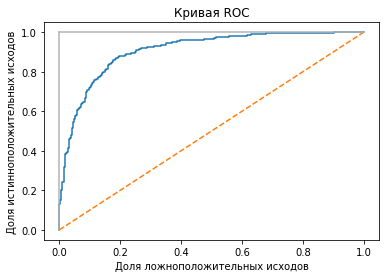

In [13]:
#построить график кривой ROC
plt.title("Кривая ROC")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7")
plt.plot([1, 1], c=".7")
plt.ylabel("Доля истинноположительных исходов")
plt.xlabel("Доля ложноположительных исходов")
plt.show()

https://matplotlib.org/3.1.1/tutorials/colors/colors.html

Во многих обучающих алгоритмах предсказанные значения основаны на вероятностных оценках, т е каждому наблюдению дается явная вероятность принадлежности в каждом классе. 
Чтобы увидеть предсказанные вероятности - нужно применить метод predict_probe

In [14]:
#предсказанные вероятности распределения по классам
logit.predict_proba(features_test)[0:1]

array([[0.8688938, 0.1311062]])

In [15]:
logit.classes_

array([0, 1])

Первое наблюдение имеет 87% шанс быть в отрицательном классе и 13% шанс быть в положительном.
По умолчанию библиотека scikitlearn предсказывает, что наблюдение является частьюположительного класса, если вероятность больше 0.5 (это вероятностный порог).
Нередко требуется сместить и использовать другой порог. Например, если ложноположительный исход - дорого обходится компании(и мы предпочтем модель с высоким вероятностным порогом).

Нам не удастся предсказать некоторорые положительные исходы, но когда наблюдение предсказано, как положительное, то можно быть уверенными - что предсказание правильное.

Этот компромисс представлен в доле истинноположительных и ложноположительных исходов.

TPR - true positive rate(recall) Количество наблюдений, предсказанных правильно, деленное на все истинноположительне наблюдения.

TPR = TP/(TP + FN)

In [ ]:
TPR - какую часть положительных исходов, мы определили как положительные

FPR - false positive rate, количестово неправильно предсказанных положительных исходов, деленное на все истинноотрицательные исходы.

FPR = FP/(FP + TN)

FPR - какую часть отрицательных исходов мы приняли за положительные 

Для каждого вероятностного порога (threshold) - есть свои доли TPR и FPR

In [18]:
print("Порог: ", threshold[116])
print("Доля истинноположительных: ", true_positive_rate[116])
print("Доля ложноположительных: ", false_positive_rate[116])

Порог:  0.5332422684258308
Доля истинноположительных:  0.810204081632653
Доля ложноположительных:  0.14901960784313725


In [21]:
print("Порог: ", threshold[50])
print("Доля истинноположительных: ", true_positive_rate[50])
print("Доля ложноположительных: ", false_positive_rate[50])

Порог:  0.7898312547309332
Доля истинноположительных:  0.5775510204081633
Доля ложноположительных:  0.052941176470588235


In [22]:
print("Порог: ", threshold[200])
print("Доля истинноположительных: ", true_positive_rate[200])
print("Доля ложноположительных: ", false_positive_rate[200])

Порог:  0.1738612849282275
Доля истинноположительных:  0.9612244897959183
Доля ложноположительных:  0.45294117647058824


Наше более высокое требование для предсказания в положительном классе заставило модель не идентифицировать ряд положительных наблюдений, но также уменьшить шум от отрицательных наблюдений, предсказываемых как положительные.

In [ ]:
Чем лучше модель, тем выше кривая ROC и больше площадь под кривой.

AUCROC  - area under the curve

Чем ближе AUCROC к 1, тем лучше модель.

In [24]:
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

# Оценивание предсказаний мультиклассового классификатора

Дана модель, которая предсказывает 3 класса или более, требуется оценить ее результативность.

Использовать перекрестную проверку с оценочным метрическим показателем, способным справляться с более чем 2 классами.

In [1]:
#загрузить библиотеки
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [2]:
#сгенерировать матрицу признаков и вектор целей
features, target = make_classification(
    n_samples=10000,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=3,
    random_state=1)

In [3]:
#создать объект логистической регрессии
logit = LogisticRegression()

In [4]:
#перекрестно проверить модель, используя показатель точности
cross_val_score(logit, features, target, scoring='accuracy')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Def

array([0.83653269, 0.8259826 , 0.81308131])

Для сбалансированных классов - точность подходит для оценки('accuracy').
Точность - это количество правильных предсказаний, деленное на количество наблюдений. Работает в мультикласовой классификации.

Для несбалансированных классов использовать другие метрические показатели.

precision, recall, f1 - можно применить к мультиклассовой конфигурации, рассматривая наши данные как набор бинарных классов. Это позволяет применить метрические показатели к каждому классу, как если бы он был единственным классом в данных, а затем агрегировать оценочные показатели, для всех классов путем их усреднения.

In [5]:
#перекрестно проверить модель, используя макроусредненную проверку f1
cross_val_score(logit, features, target, scoring='f1_macro')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Def

array([0.83613125, 0.82562258, 0.81293539])

macro - рассчитать среднее метрических ценок для каждого класса, взвешивая каждый класс одинаково

weighted - рассчитать среднее метрических ценок для каждого класса, взвешивая каждый класс пропорционально его размеру в данных

micro - рассчитать среднее метрических ценок для каждой комбинации "класс-наблюдение"

# Визуализация результативности классификатора

Даны предсказанные классы и истинные классы текстовых данных, и требуется визуально сопоставить качество модели.

Использовать матрицу ошибок(несоответствий), которая сравнивает предсказанные и истинные классы.

In [1]:
#загрузить библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
#создать матрицу признаков
features = iris.data
#создать вектор целей
target = iris.target

In [4]:
#создать список имен целевых классов
class_names = iris.target_names

In [5]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

In [6]:
#создать объект логистической регрессии
classifier = LogisticRegression()

In [7]:
#натренировать модель и сделать предсказания
target_predicted = classifier.fit(features_train, target_train)
target_predicted = target_predicted.predict(features_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [8]:
#создать матрицу ошибок
matrix = confusion_matrix(target_test, target_predicted)

In [10]:
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

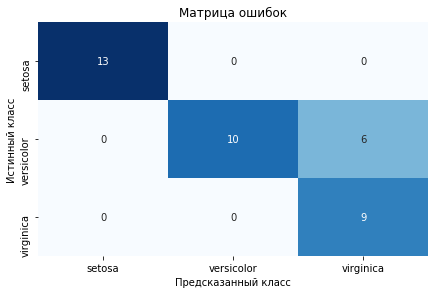

In [11]:
#создать тепловую карту
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues") #annot нужно ли ставить цифры в ячейки
plt.title("Матрица ошибок")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

Матрицы ошибок (несоответствий) - это простая и эффективная визуализация качества работы классификатора. Столбец - предсказанные классы. Строка - истинные классы. Каждая ячейка - одна возможная комбинация предсказанных и истинных классов.

In [13]:
#help(sns.heatmap)

Идеальная модель - значения вдоль диагонали и нули в остальных ячейках.
Плохая модель - количество наблюдений равномерно распределено по ячейкам.

Матрица ошибок позволяет увидеть - не только, где модель была неправильной, но и как она была неправильной. Т е мы можем взглянуть на шаблоны неправильной классификации.

Матрицы ошибок работают с любым количеством классов.

# Оценивание регрессионных моделей

https://scikit-learn.org/stable/modules/model_evaluation.html

All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

Требуется оценить результативность регрессионной модели

Использовать MSE(mean squared error)

In [2]:
#загрузить библиотеки
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [5]:
#сгенерировать матрицу признаков, вектор целей
features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=50,
                                   coef=False,
                                   random_state=1)

In [6]:
#создать объект линейной регрессии
ols = LinearRegression()

In [7]:
#перекрестно проверить линейную регрессию, используя (отрицательный) показатель MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([-1718.22817783, -3103.4124284 , -1377.17858823])

Eще один распространенный метрический показатель регрессии коэффициент R^2

In [8]:
#перекрестно проверить линейную регрессию, используя показатель R^2
cross_val_score(ols, features, target, scoring='r2')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.87804558, 0.76395862, 0.89154377])

MSE является одним из наиболее распространенных оценочных показателей для регрессионных моделей.
Формально MSE имеет вид:

\begin{equation*} MSE = \frac{1}{n}  \sum_{i=1}^{n} (\hat{y_i} - y_i)^2 \end{equation*}

n - число наблюдений

\begin{equation*}  y_i \end{equation*} - истинное целевое значение

\begin{equation*}  \hat{y_i} \end{equation*} - предсказанное моделью значение для   y_i 

MSE - это мера квадратичной суммы для всех расстояний между предсказанными и истинными значениями. Чем выше значение MSE, тем больше общая квадратичная ошибка, и тем хуже модель. Плюс от возведения в квадрат - значения всех ошибок положительные. Особенность - штрафует несколько крупных ошибок больше, чем множество мелких(даже если абсолютные значения ошибки одинаковые).

Важное замечание: в библиотеке scikit-learn аргументы переменной scoring чем больше - тем лучше. Но это не относится к MSE (тут более высокие значения - худшая модель). Поэтому используется - neg_mean_squared_error.

R^2 - также используется как оценочный показатель регрессии (измеряет величину дисперсии в векторе целей)

\begin{equation*} R^2 = 1 -  \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y_i})^2} \end{equation*}

n - число наблюдений

\begin{equation*}  y_i \end{equation*} - истинное целевое значение

\begin{equation*}  \hat{y_i} \end{equation*} - предсказанное моделью значение для   y_i 

\begin{equation*} \bar{y_i}\end{equation*} -среднее значение вектора целей 

Чем ближе к 1, тем лучше модель.

# Оценивание кластеризующих моделей

Применен неконтролируемо обучающийся алгоритм с целью кластеризации данных. Теперь требуется узнать, насколько хорошо он справился со своей работой.

Оценка кластеризации с использованием силуэтных коэффициентов.

In [8]:
#загрузить библиотеки
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
% matplotlib inline

In [6]:
#сгенерировать матрицу признаков
features, _ = make_blobs(n_samples=1000,
                        n_features=10,
                        centers=2,
                        cluster_std=0.5,
                        shuffle=True,
                        random_state=1)

In [10]:
print(features)

[[-1.69447144  3.23887889 -5.90612526 ...  1.84068368 -7.95912024
  -6.33972358]
 [-1.46528223  3.13504785 -5.54488655 ...  0.46824734 -7.31223947
  -6.33047766]
 [-1.38723852  3.78863535 -6.15814893 ...  2.0206174  -7.53142717
  -5.60147422]
 ...
 [-1.07462939  3.27468549 -5.79053892 ...  0.45251815 -7.15140785
  -6.36095282]
 [-1.45810635  4.57155117 -6.12525727 ...  1.32757808 -7.12927195
  -5.49113664]
 [-1.84629813  3.74593658 -9.96694552 ... -3.26826911 -1.94726487
   1.51474148]]


In [12]:
#кластеризовать данные, используя алгоритм к-средних, чтобы предсказать классы
model = KMeans(n_clusters=2, random_state=1)
model = model.fit(features)

In [13]:
#получить предсказанные классы
target_predicted = model.labels_

In [14]:
#оценить модель
silhouette_score(features, target_predicted)

0.8916265564072142

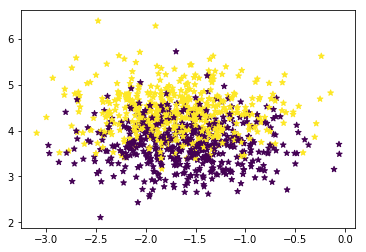

In [15]:
plt.scatter(features[:, 0], features[:, 1], marker='*', c=target_predicted)

В кластеризующих методах данные - не имеют вектора целей.
Мы можем оценить природу кластеров.
"Хорошие" кластеры имеют очень малые растояния между наблюдениями в одном кластере(плотные кластеры) и большие растояния между разными кластерами(хорошо разделенные кластеры). 

Силуэтные коэффициенты  - измеряют сразу обе черты:

\begin{equation*} s_i = \frac{b_i - a_i}{\max(a_i, b_i)}  \end{equation*}

s_i  - силуэтный коэффициент для наблюдения i

a_i  - среднее расстояние между i и всеми наблюдениями одного класса

b_i  - среднее расстояние между i и всеми наблюдениями из ближайшего кластера другого класса.

Значение, возвращаемое параметром silhouette_score, является средним силуэтным коэффициентом для всех наблюдений.

Силуэтные коэффициенты варьируются от -1 до 1. Причем 1 указывает на плотные, хорошо разделенные кластеры.

# Создание собственного оценочного метрического показателя

Требуется оценить модель с помощью созданного метрического показателя.

Создать метрический показатель как функцию и конвертировать его в оценочную функцию, используя фабричную функцию make_scorer библиотеки scikit learn.

In [1]:
#загрузить библиотеки
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn .datasets import make_regression

In [2]:
#сгенерировать матрицу признаков и вектор целей
features, target = make_regression(n_samples=100,
                                  n_features=3,
                                  random_state=1)

In [3]:
#создать тренировочные и тестовые наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [4]:
#создать собственный метрический показатель
def custom_metric(target_test, target_predicted):
    #вычислить оценочный показатель r - квадрат
    r2 = r2_score(target_test, target_predicted)
    return r2

In [5]:
#создать оценочную функцию и установить, что чем выше оценки, тем они лучше
score = make_scorer(custom_metric, greater_is_better=True)

In [6]:
#создать объект гребневой регрессии
classifier = Ridge()

In [7]:
model = classifier.fit(features_train, target_train)

In [8]:
#применить собственную оценочную функцию
score(model, features_test, target_test)

0.9997906102882058

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

In [9]:
help(score)

Help on _PredictScorer in module sklearn.metrics.scorer object:

class _PredictScorer(_BaseScorer)
 |  _PredictScorer(score_func, sign, kwargs)
 |  
 |  Method resolution order:
 |      _PredictScorer
 |      _BaseScorer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, estimator, X, y_true, sample_weight=None)
 |      Evaluate predicted target values for X relative to y_true.
 |      
 |      Parameters
 |      ----------
 |      estimator : object
 |          Trained estimator to use for scoring. Must have a predict_proba
 |          method; the output of that is used to compute the score.
 |      
 |      X : array-like or sparse matrix
 |          Test data that will be fed to estimator.predict.
 |      
 |      y_true : array-like
 |          Gold standard target values for X.
 |      
 |      sample_weight : array-like, optional (default=None)
 |          Sample weights.
 |      
 |      Returns
 |      -------
 |      score : float
 |          Score 

Использование фабричной функции make_scorer 

1)мы определяем фунцию, которая принимает 2 аргумента: целевой метод полевых наблюдений и наши предсказанные значения

эта функция - выдает некоторую оценку

2)используем функцию make_scorer для создания объекта scorer, указав, являются ли более всокие или более низкие оценки желательными.

Собственный метрический показатель custom_metric является игрушечным примером, поскольку он просто обертывает встроенный метрический показатель, вычисляющий оценку r2.

В реальнойситуации можно заменить custom_metric на любой собственный метрический показатель, который требуется.
Но даже текущий метрический показатель - работает, сравним(со встроенным в scikit_learn методом r2_score:

In [10]:
target_predicted = model.predict(features_test)
r2_score(target_test, target_predicted)

0.9997906102882058

# Визуализация эффекта размера тренировочного набора

Требуется оценить эффект влияния количества наблюдений в тренировочном наборе на некоторый метрический показатель(точность, F1 итд).

Построить график кривой заучивания.

In [1]:
#загрузить библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [2]:
#загрузить данные
digits = load_digits()

In [3]:
#создать матрицу признаков и вектор целей
features, target = digits.data, digits.target

In [4]:
#создать перекрестно-проверочные тренировочные и тестовые 
#оценки для разных размеров тренировочного набора

train_sizes, train_scores, test_scores = learning_curve(
                            RandomForestClassifier(), #классификатор
                            features, #матрица признаков
                            target,   #вектор целей
                            cv=10,    #колиество блоков
                            scoring='accuracy', #показатель результативности
                            n_jobs=-1, #использовать все ядра CPU
                            train_sizes=np.linspace(0.01, 1.0, 50)) #размеры 50 тренировочных наборов

In [5]:
#создать среднее и стандартные отклонения оценок тренировочного набора
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [12]:
print('train_mean = ', train_mean)
print('train_std = ', train_std)

train_mean =  [0.99375    0.99791667 0.99876543 1.         0.99863014 0.9988764
 1.         1.         0.99927536 0.99967638 0.99853372 0.99946524
 0.99950739 0.99931663 0.99915254 0.99900794 0.9990689  0.99876977
 0.99950166 0.99952681 0.9994003  0.99885714 0.99945355 0.99934641
 0.99949812 0.99975904 0.99965197 0.99955307 0.99935345 0.9990625
 0.99959718 0.99931707 0.99971645 0.9993578  0.99955476 0.99930796
 0.99957912 0.9995086  0.99920192 0.9996112  0.99992413 0.9996299
 0.99956647 0.99971751 0.99924086 0.99945982 0.99966975 0.99954722
 0.99962001 0.99944169]
train_std =  [0.01875    0.00625    0.0037037  0.         0.00273973 0.00224719
 0.         0.         0.00144928 0.00097087 0.00146628 0.00106952
 0.00098522 0.00145857 0.00140535 0.00099206 0.0012492  0.00137263
 0.00076123 0.0007228  0.00099449 0.00085714 0.00066926 0.00087689
 0.00061468 0.00048193 0.00074282 0.00054737 0.00071479 0.00118311
 0.000668   0.00087805 0.00043314 0.00058744 0.00059735 0.00064735
 0.00077606 0.

In [13]:
#создать среднее и стандартные отклонения оценок тестового набора
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print('test_mean = ', test_mean)
print('test_std = ', test_std)

test_mean =  [0.40435932 0.55280609 0.59889588 0.66455942 0.69144105 0.715699
 0.73751764 0.7434941  0.75532023 0.79072008 0.7927662  0.81289599
 0.82907329 0.82296021 0.82810399 0.85299038 0.86238925 0.86024862
 0.87012832 0.86968472 0.87167573 0.87591014 0.87307122 0.88031981
 0.89419646 0.88555235 0.88656474 0.89196971 0.88311182 0.89133485
 0.89205315 0.89322504 0.90259106 0.90517087 0.89526107 0.89046102
 0.8932172  0.90489159 0.89434181 0.91488484 0.91002576 0.91431497
 0.90821274 0.91165857 0.91309568 0.91146496 0.92338848 0.91114988
 0.91938332 0.92104921]
test_std =  [0.08136107 0.07767134 0.0940748  0.07719667 0.07791081 0.08533209
 0.07455025 0.07365316 0.06353843 0.05088909 0.07224313 0.06956391
 0.06259694 0.04969541 0.06154169 0.04755939 0.04045921 0.0517642
 0.04124206 0.03556075 0.03006624 0.02586194 0.03195627 0.03056186
 0.02669216 0.0307573  0.0341535  0.03108471 0.03890195 0.0342361
 0.03120778 0.03641262 0.03503089 0.03186983 0.03131792 0.03769615
 0.02892344 0.036

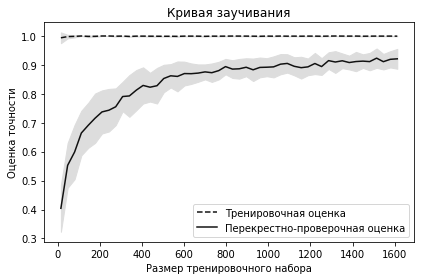

In [11]:
#нанести линии
plt.plot(train_sizes, train_mean, '--', color='#111111', label='Тренировочная оценка')
plt.plot(train_sizes, test_mean, color='#111111', label='Перекрестно-проверочная оценка')

#нанести полосы
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

#построить график
plt.title("Кривая заучивания")
plt.xlabel("Размер тренировочного набора")
plt.ylabel("Оценка точности")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Кривые заучивания визуализируют результативность(напр, точность, полноту) модели на тренировочном наборе и во время перекрестной проверки по мере увеличения количества наблюдений в тренировочном наборе.

Широко используются, если нужно понять выигрывают ли наши обучающие алгоритмы от сбора дополнительных тренировочных данных.

В данном примере, мы строим график точности классификатора случайного леса при 50 разных размерах тренировочного набора от 1 % наблюдений до 100%. Возрастаемая оценка точности перекрестно-проверяемых моделей говорит о том, что мы скорее всего выигрываем от допонительных наблюдений.

# Создание тестового отчета об оценочных метрических показателях

Требуется краткое описание результативности классификатора.

Использовать функцию classification_report библиотеки scikit-learn

In [1]:
#загрузить библиотеки
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
#загрузить данные
iris = datasets.load_iris()

In [4]:
#создать матрицу признаков и вектор целей
features, target = iris.data, iris.target

In [5]:
#создать список имен целевых классов
class_names = iris.target_names

In [6]:
#разбить на тренировочный и тестовые наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

In [8]:
#создать объект Логистической регрессии
clf = LogisticRegression()

In [9]:
model = clf.fit(features_train, target_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [10]:
target_predicted = model.predict(features_test)

In [12]:
#создать классификационный отчет
print(classification_report(target_test, target_predicted, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.62      0.77        16
   virginica       0.60      1.00      0.75         9

    accuracy                           0.84        38
   macro avg       0.87      0.88      0.84        38
weighted avg       0.91      0.84      0.84        38



# Визуализация эффекта значений гиперпараметра

Треюуется разобраться в том, как результативность модели изменяется по мере изменения значений некоторого гиперпараметра.

Построить график валидационной кривой.

In [13]:
#загрузить библиотеки
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [14]:
#загрузить данные
digits = load_digits()

In [15]:
#создать матрицу признаков и вектор целей
features, target = digits.data, digits.target

In [17]:
#создать диапазон значений для параметра
param_range = np.arange(1, 250, 2)

In [18]:
#вычислить точность на тренировочном и тестовом наборах, 
#используя диапазон значений параметра
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), #классификатор
    features,                 #матрица признаков
    target,                   #вектор целей
    param_name="n_estimators", #исследуемый гиперпараметр #количество деревьев в лесе
    param_range=param_range,   #диапазон значений гиперпараметров
    cv=3,                      #количество блоков
    scoring="accuracy",        #показатель результативности
    n_jobs=-1)                 #использовать все ядра CPU

In [19]:
#вычислить среднее и стандартное отклонение для оценок тренировочного набора
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [20]:
#вычислить среднее и стандартное отклонение для оценок тестового набора
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

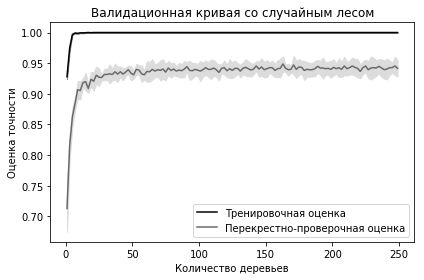

In [22]:
#построить график средних оценок точности для тренировочного и тестового наборов
plt.plot(param_range, train_mean, color="black", label="Тренировочная оценка")
plt.plot(param_range, test_mean, color="dimgrey", label="Перекрестно-проверочная оценка")
#Нанести полосы точности для тренировочного и тестового наборов
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="grey")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

#создать график
plt.title("Валидационная кривая со случайным лесом")
plt.xlabel("Количество деревьев")
plt.ylabel("Оценка точности")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Значения гиперпараметров выбираются при отборе модели. График показывает как результативность модели изменяется по мере изменения значения гиперпараметра.
При небольшом количестве деревьев - тренировочная и перекрестно-проверочная оценки - низкие, что свидетельствует о том, что модель недостаточно подогнана.
Когда количество деревьев увеличивается до 250, точность обоих выравнивается. Это свидетельствует о том, что не будет какой-то особой ценности в вычислительных затратах на тренировку.

Параметры validation_curve:

param_name - имя варьируемого гиперпараметра
param_range - используемое значение гиперпараметра
scoring - оценочный метрический показатель, используемый для оценивания модели